# `"Occupancy Detection Data Set"`
## Problema di classificazione

## DESCRIZIONE
Il dataset lega la temperatura, umidità, luminosità e inquinamento ($CO_2$) di una stanza al fatto che questa sia occupata o meno. Quest'ultimo dato è stato ottenuto verificando le foto scattate alla stanza ogni minuto.

> URL: [archive.ics.uci.edu](https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+)    
Data di rilascio: 2016-02-29  
Cratori e donatori: Luis Candanedo

**Citazioni**  
_''Accurate occupancy detection of an office room from light, temperature, humidity and CO2 measurements using statistical learning models''_, Luis M. Candanedo, Véronique Feldheim. Energy and Buildings. Volume 112, 15 January 2016, Pages 28-39

## Importazione del dataset

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import date2num

# Enable matplotlib to convert pandas formats
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline

In [0]:
!wget "https://raw.githubusercontent.com/fmardero/MLedulife/master/lesson_03/occupancy_detection.csv"

--2019-10-16 10:38:22--  https://raw.githubusercontent.com/fmardero/MLedulife/master/lesson_03/occupancy_detection.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1496961 (1.4M) [text/plain]
Saving to: ‘occupancy_detection.csv’

occupancy_detection 100%[===================>]   1.43M  --.-KB/s    in 0.08s   

2019-10-16 10:38:23 (18.5 MB/s) - ‘occupancy_detection.csv’ saved [1496961/1496961]



In [0]:
df = pd.read_csv('occupancy_detection.csv')

In [0]:
df.drop(columns=['idx'], inplace=True)

# Cast field to pandas datetime64 format
df['date'] = pd.to_datetime(df['date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20560 entries, 0 to 20559
Data columns (total 7 columns):
date             20560 non-null datetime64[ns]
Temperature      20560 non-null float64
Humidity         20560 non-null float64
Light            20560 non-null float64
CO2              20560 non-null float64
HumidityRatio    20560 non-null float64
Occupancy        20560 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 1.1 MB


**Breve Dizionario**

> _date_ : year-month-day hour:minute:second  
_Temperature_ : in Celsius  
_Relative Humidity_ : percentage, in kgwater-vapor/(kg-air + kgwater-vapor)  
_Light_ : in Lux  
_CO2_ : in ppm  
_Humidity Ratio_ : Derived quantity from temperature and relative humidity, in kgwater-vapor/kg-air  
_Occupancy_ : 0 or 1, 0 for not occupied, 1 for occupied status


In [0]:
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [0]:
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,20.906212,27.655925,130.756622,690.553276,0.004228,0.231031
std,1.055315,4.982154,210.430875,311.201281,0.000768,0.421503
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000
50%,20.700000,27.290000,0.000000,565.416667,0.004292,0.000000
75%,21.525000,31.290000,301.000000,804.666667,0.004832,0.000000
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000


**Nessun valore mancante per le covariate disponibili**

### "Correzioni" alle date

In [0]:
df.head(2)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.700,26.272,585.2,749.2,0.004764,1
1,2015-02-02 14:19:59,23.718,26.290,578.4,760.4,0.004773,1


In [0]:
# Correct dates having all hh:mm:00 format
def correct_datetime(x):
    if x.second == 59:
        x += pd.Timedelta('1 sec')        
    return x

df.date = df.date.apply(correct_datetime)

df.set_index('date', inplace=True)
df.sort_index(inplace=True)

In [0]:
df.head(2)

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-02 14:19:00,23.700,26.272,585.2,749.2,0.004764,1
2015-02-02 14:20:00,23.718,26.290,578.4,760.4,0.004773,1


### Giorni analizzati

In [0]:
print(f'Sampling days ({len(np.unique(df.index.date))} days): ')
for day in sorted(np.unique(df.index.date)):
    print('\t', day)

Sampling days (17 days): 
	 2015-02-02
	 2015-02-03
	 2015-02-04
	 2015-02-05
	 2015-02-06
	 2015-02-07
	 2015-02-08
	 2015-02-09
	 2015-02-10
	 2015-02-11
	 2015-02-12
	 2015-02-13
	 2015-02-14
	 2015-02-15
	 2015-02-16
	 2015-02-17
	 2015-02-18


### Pandas Profiling

In [0]:
#import pandas_profiling as pp
#pp.ProfileReport(df)

## Check righe duplicate

In [0]:
# Duplicated rows
print(f'There are {df.reset_index().duplicated().sum()} duplicated rows.')

There are 0 duplicated rows.


## Analisi Serie Temporale

In [0]:
# Create a temporal sequence (freq=minute) form min available date to the maximum one
min_max_dates = pd.date_range(start=df.index.min(), end=df.index.max(), freq='1min')
min_max_dates

DatetimeIndex(['2015-02-02 14:19:00', '2015-02-02 14:20:00',
               '2015-02-02 14:21:00', '2015-02-02 14:22:00',
               '2015-02-02 14:23:00', '2015-02-02 14:24:00',
               '2015-02-02 14:25:00', '2015-02-02 14:26:00',
               '2015-02-02 14:27:00', '2015-02-02 14:28:00',
               ...
               '2015-02-18 09:10:00', '2015-02-18 09:11:00',
               '2015-02-18 09:12:00', '2015-02-18 09:13:00',
               '2015-02-18 09:14:00', '2015-02-18 09:15:00',
               '2015-02-18 09:16:00', '2015-02-18 09:17:00',
               '2015-02-18 09:18:00', '2015-02-18 09:19:00'],
              dtype='datetime64[ns]', length=22741, freq='T')

In [0]:
# Check if the dataset contains all possible intervals
len(df.index), len(min_max_dates)

(20560, 22741)

**Mancano alcune righe rispetto a quelle che ci si attenderebbe sulla base delle date di campionamento!**

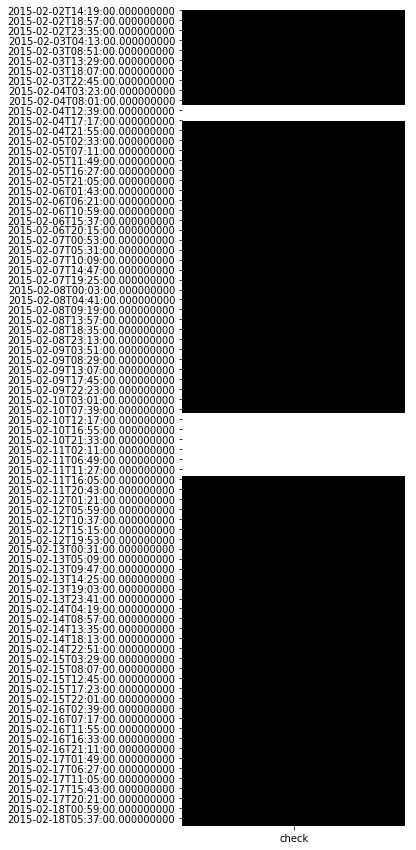

In [0]:
# True if the date in the dataset is in the [min_date, max_date] database
min_max_check = pd.DataFrame(min_max_dates.isin(df.index), index=min_max_dates, columns=['check'])

plt.figure(figsize=(4, 15))
# Heat map with usual bar palette swapped
ax = sns.heatmap(min_max_check, annot=False, cmap=['w', 'k'], cbar=False)

**Il campionamento è assente per due diverse finestre temporali**

##Analisi univariata e multivariata

In [0]:
# Identify the windows where the sampling is absent
dates_jump = []
for i in range(len(df) - 1):
    if (df.index[i+1] - df.index[i]) > pd.Timedelta('1 min'):
        # Store beginning and ending date of the jump
        dates_jump.append([df.index[i] + pd.Timedelta('1 min'), 
                           df.index[i+1] - pd.Timedelta('1 min')])

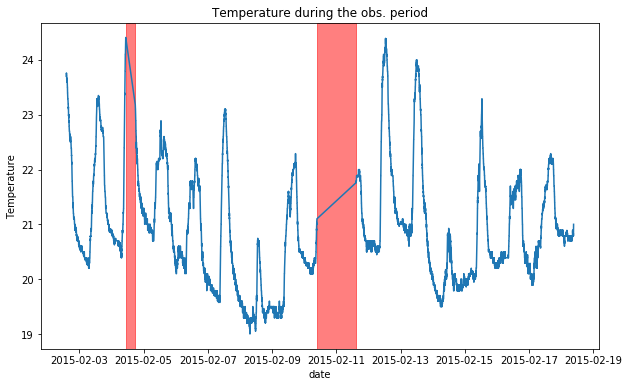

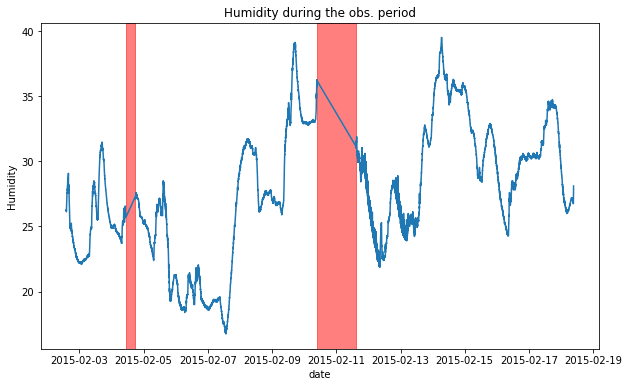

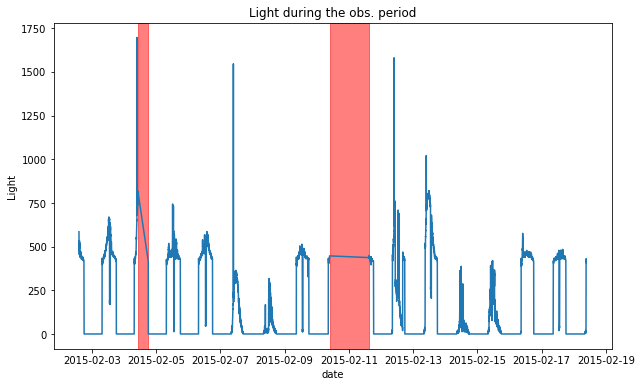

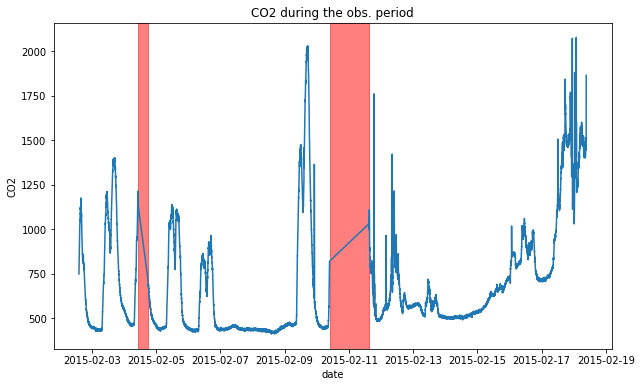

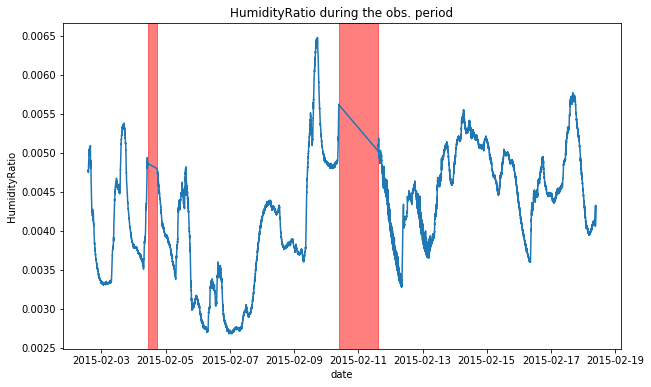

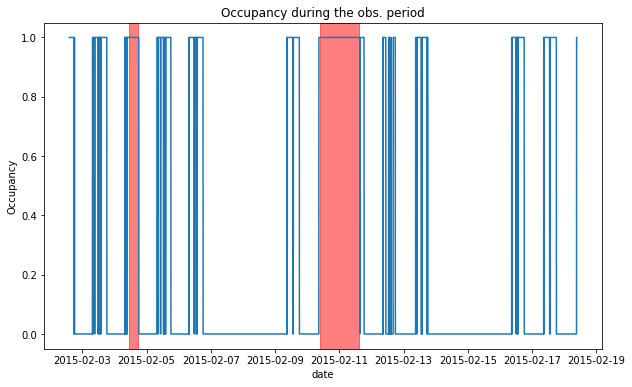

In [0]:
for col in df.columns.tolist():
    # Plot the feature trend
    plt.figure(figsize=(10, 6))
    ax = sns.lineplot(data=df[col])
    ax.set_xlabel('date')
    ax.set_ylabel(col)
    plt.title(f'{col} during the obs. period')

    # Draw the time window where there is not sampling
    for djump in dates_jump:
        ax.axvspan(date2num(djump[0]), date2num(djump[1]), alpha=0.5, color='red')

**Tutte le covariate sembra abbiano un andamento ciclico nel corso della giornata**

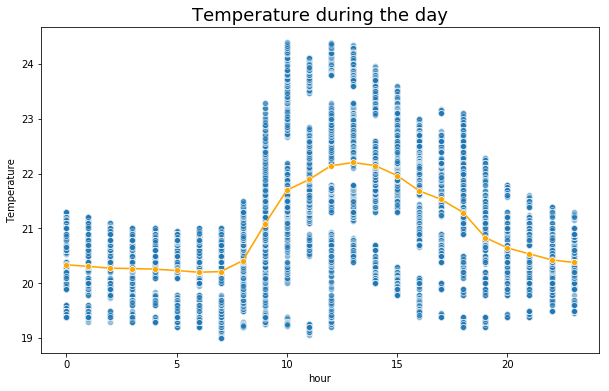

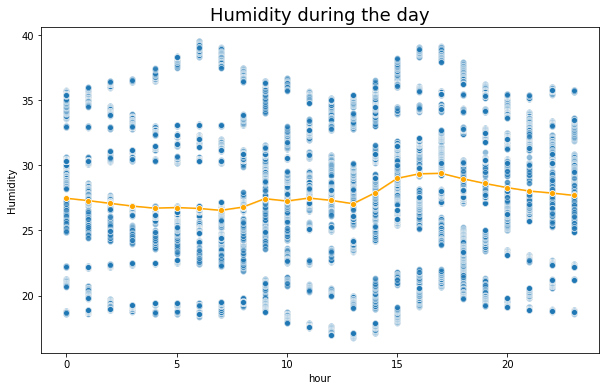

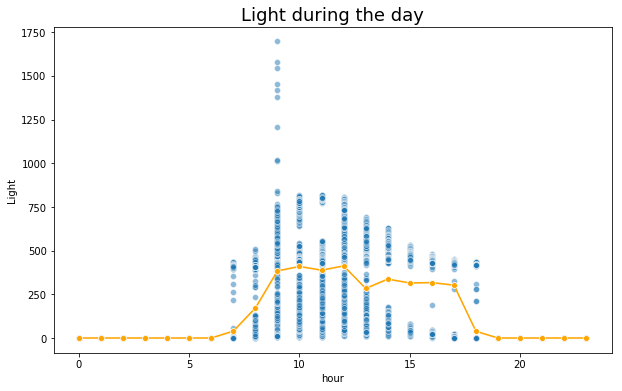

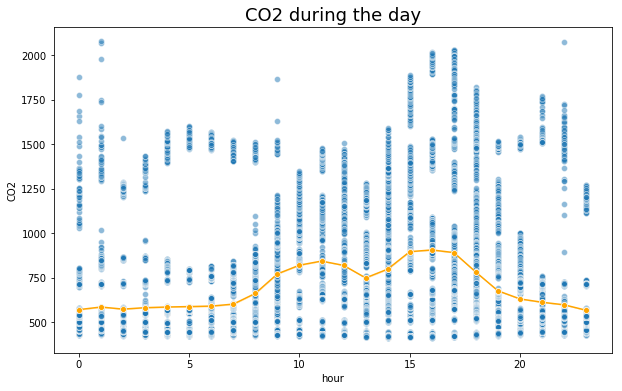

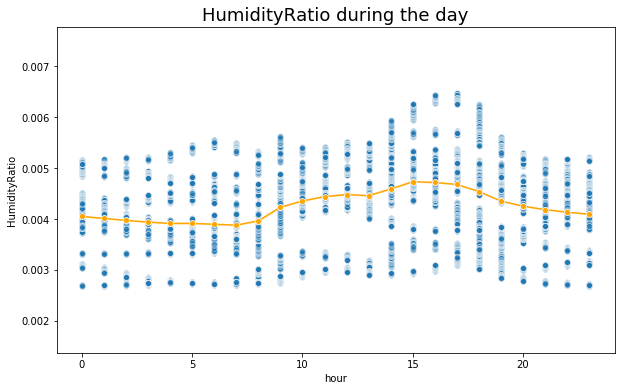

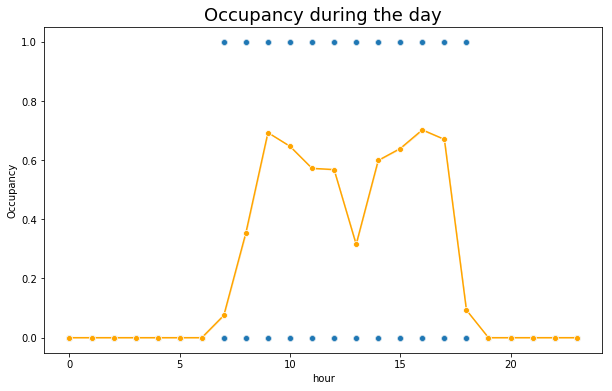

In [0]:
for col in df.columns.tolist():
    plt.figure(figsize=(10, 6))
    # df.index.hour truncates the hour from the datetime object
    ax = sns.scatterplot(x=df.index.hour, 
                         y=df[col],
                         alpha=0.5)
    
    sns.lineplot(x=df.index.hour, 
                 y=df[col],
                 estimator='mean',
                 ci=False,
                 marker='o',
                 color='orange', 
                 ax=ax)

    ax.set_title(f'{col} during the day', fontsize=18)
    ax.set_xlabel('hour')
    ax.set_ylabel(col)

**I valori assunti dalle feature durante la giornata appaiono stabili di giorno in giorno fatta eccezione per la variabile che descrive l'intensità luminosta a cui è esposta la stanza**

> É importante ricercare quali sono i motivi di questa particolarità. Nel caso in cui si tratti di un'anomalia o di errore di misurazione è opportuno correggere il dato o escluderlo dal dataset

### Analisi del picco di luminosità

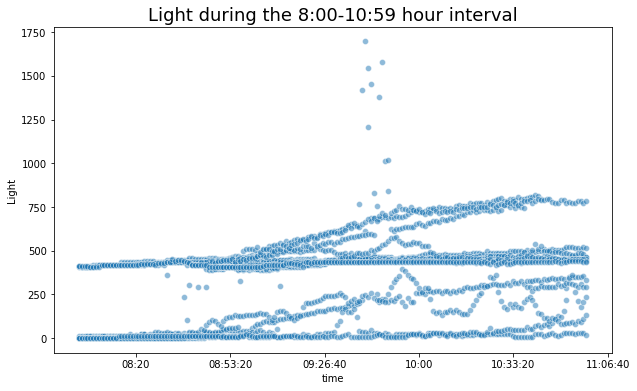

In [0]:
# Select only the samples within the interesting time interval
mask = df.index.hour.isin([8, 9, 10])

fig = plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x=df.loc[mask, 'Light'].index.time, 
                     y=df.loc[mask, 'Light'],
                     alpha=0.5)

ax.set_title('Light during the 8:00-10:59 hour interval', fontsize=18)
ax.set_xlabel('time')
ax.set_ylabel('Light')
plt.show()

**Pochissimi punti assumono valori estremi di luminosità ed ora sappiamo con maggiore precisione l'intervallo temporale a cui si riferiscono**

In [0]:
mask_new = (df.index.hour == 9) & (df.index.minute.isin(range(35, 56)))

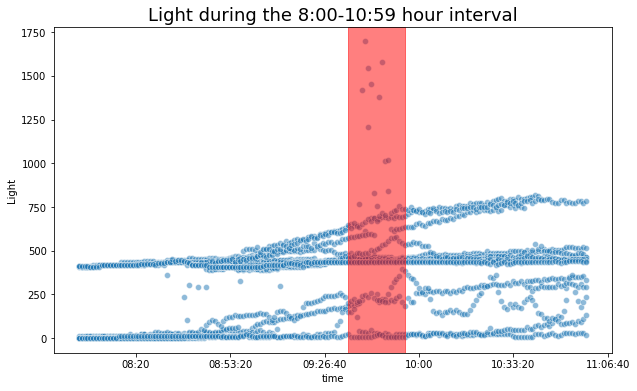

In [0]:
fig = plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x=df.loc[mask, 'Light'].index.time, 
                     y=df.loc[mask, 'Light'],
                     alpha=0.5)

# Add the masked time window
ax.axvspan(df.loc[mask_new].index.time.min(), 
           df.loc[mask_new].index.time.max(), 
           alpha=0.5, 
           color='red')

ax.set_title('Light during the 8:00-10:59 hour interval', fontsize=18)
ax.set_xlabel('time')
ax.set_ylabel('Light')
plt.show()

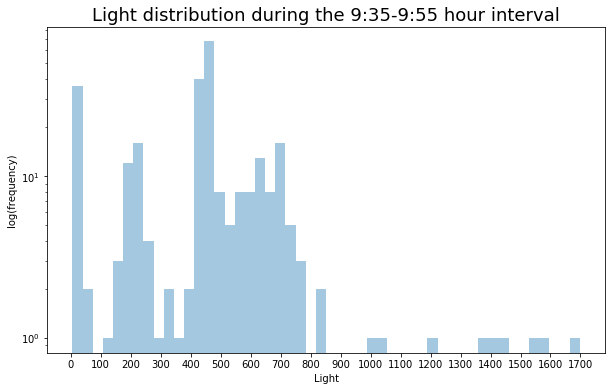

In [0]:
plt.figure(figsize=(10, 6))

# We could use np.log1p but we can not understand the treshold
ax = sns.distplot(df.loc[mask_new, 'Light'], bins=50, kde=False, rug=False)

# Set y scale as logarithmic
ax.set_yscale('log')

# Change x ticks
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, end, 100))

ax.set_title('Light distribution during the 9:35-9:55 hour interval', fontsize=18)
ax.set_xlabel('Light')
ax.set_ylabel('log(frequency)')
plt.show()

In [0]:
df_light = df.loc[mask].query('Light > 820')

print(f'No. of points considered: {len(df_light)}')

No. of points considered: 11


In [0]:
df_light

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-04 09:40:00,22.600,25.472500,1419.500000,945.000000,0.004319,1
2015-02-04 09:41:00,22.700,25.500000,1697.250000,951.750000,0.004350,1
2015-02-04 09:42:00,22.700,25.456000,1209.800000,958.600000,0.004343,1
2015-02-07 09:42:00,20.700,18.890000,1546.333333,455.333333,0.002845,0
2015-02-07 09:43:00,20.745,18.890000,1451.750000,453.000000,0.002853,0
2015-02-07 09:44:00,20.760,18.856667,829.000000,452.666667,0.002850,0
2015-02-12 09:46:00,22.772,25.290000,1380.000000,1202.500000,0.004333,1
2015-02-12 09:47:00,22.790,25.290000,1581.000000,1211.500000,0.004338,1
2015-02-12 09:48:00,22.790,25.100000,1010.500000,1215.500000,0.004305,1


> Come si può osservare dalle date, i picchi di luminosità si riferiscono a quattro giorni diversi (sui 17 su cui sono stati raccolti i dati) e durano al massimo 4 minuti. 

**Il fenomeno non sembra casuale e quindi occorre tenerne conto**

D'altra parte i valori sono così estremi che, pur essendo pochi, influenzano significativamente le metriche calcolate su questo campo (sono outlier) e per il perido 9:00-10:00.

**Per migliorare le capacità predittive del modello è quindi opportuno non considerare in prima istanza questi picchi di luminosità**

**Non conoscendo però il motivo per cui si rilevano questi valori (sono anomalie?) bisogna definire un processo in grado di gestire l'eventuale ripetersi di rilevazioni simili**

Vi sono due possibili alternative comportamentali:

1.   *Incapacità nel fornire una previsione*: dato un sistema di individuazione delle "anomalie", si dichiara che in questi casi non è possibile fornire previsioni
2.   *Previsione basata sui soli casi estremi*: si construisce uno specifico algoritmo in grado di modellizzare i soli casi estremi e di fornire previsioni sulla base di questi valori

Il punto (1) è da preferirsi quando è richiesta una determinata **precisione e confidenza minima** del modello. Data la potenziale bassa significatività dei dati con valori estremi l'incertezza sulle previsioni potrebbe essere elevata.

Il punto (2) è applicabile quando il sistema deve per forza fornire una previsione, qualsiasi sia il dato in input. Si presti attenzione ancora una volta alla numerosità dei dati; si consiglia pertanto di utilizzare modelli estremamente semplici (`anomaly detection` e/o `extreme value theory`).


In questo caso, seguendo il primo approccio, i dati saranno semplicemente scartati dal dataset per la successiva modellizzazione generale. Si definisce di seguito la più basica delle funzioni con cui separare le anomalie osservate, e che si pensa di osservare in futuro, dal resto dei datapoints.

In [0]:
# Returns "True" for the rows that contain extreme values
def detect_extreme_values(df):
    data = df.copy()
    mask_time = (df.index.hour == 9) & (df.index.minute.isin(range(35, 56)))
    mask_value = df.Light > 820
    data['extreme_datapoint'] = mask_time & mask_value
    return data

### Matrici di correlazione

**Correlazione di Pearson**

$$corr(X, Y) = \frac{cov(X, Y)}{\sqrt{var(X) var(Y)}}$$
dove
$$cov(X, Y) = \mathbb{E}[(X-\mathbb{E}[X])(Y-\mathbb{E}[Y])]$$

> Se $X$ e $Y$ sono indipendenti allora $cov(X, Y) = 0$ e $corr(X, Y) = 0$.

Si può dimostrare questa proprietà considerando che due variabili aleatorie si dicono indipendenti quando 
$$\mathbb{E}[XY]=\mathbb{E}[X]\mathbb{E}[Y]$$

*   Il coefficiente di correlazione è simmetrico: $corr(X, Y) = corr(Y, X)$
*   $corr(X, X) = 1$
*   Il coefficiente di correlazione è compreso tra -1 e 1; per tali valori si raggiunge rispettivamente il grado massimo di correlazione negativa e positiva
*   Se $|corr(X, Y)|=1$ allora vi è una dipendenza lineare tra $X$ e $Y$

**Per un campione**
$$r_{XY}=\frac{\sum_{i=1}^{N} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{N} (x_i - \bar{x})^2}\sqrt{\sum_{i=1}^{N} (y_i - \bar{y})^2}}$$

Una interpretazione grafica: [Wikipedia](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient#Geometric_interpretation)

**!! Attenzione a non confondere correlazione con causalità !!**
> `È colpa dei pompieri se ci sono tanti incendi! Più ce n'è in un luogo, più grande è l'incendio che scoppia!`

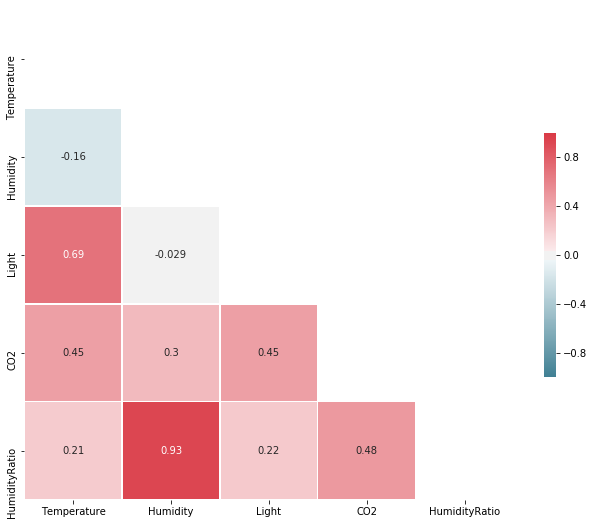

In [0]:
corr = df.drop(columns='Occupancy').corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
            mask=mask,
            cmap=cmap, 
            vmin=-1, 
            vmax=1, 
            annot=True,
            center=0,
            square=True,
            linewidths=.5, 
            cbar_kws={"shrink": .5})

**Come ci si aspettava il campo `HumidityRatio` è estremamente correlato con `Humidity`**

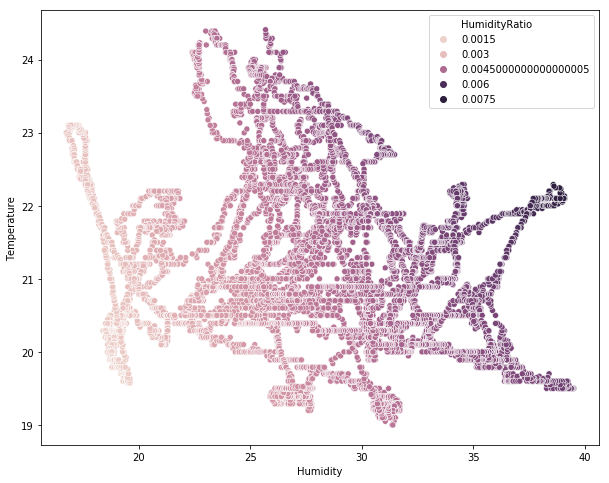

In [0]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Humidity', 
                y='Temperature', 
                hue='HumidityRatio',
                data=df,
                linewidth=0.5)

## Training & Validation

In [0]:
import warnings
warnings.filterwarnings('ignore')

from graphviz import Source
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, RepeatedKFold, RepeatedStratifiedKFold

### (1) Feature pre-processing

In [0]:
# Hour is a cyclical feature
df['Hour_sin'] = np.sin(2 * np.pi * df.index.hour/23.0)
df['Hour_cos'] = np.cos(2 * np.pi * df.index.hour/23.0)

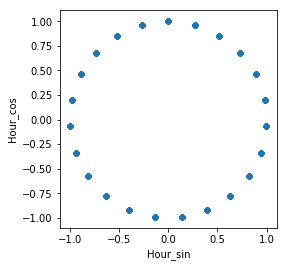

In [0]:
df.iloc[:3601].plot.scatter('Hour_sin', 'Hour_cos').set_aspect('equal')

**É opportuno scartare il campo `HumidityRatio`**

In [0]:
df.drop(columns=['HumidityRatio'], inplace=True)

### (2) Partizionamento del dataset & Definizione del perimetro

**Definiamo il dataset che sarà modellizzato**

In [0]:
extreme_values_idx = detect_extreme_values(df).query('extreme_datapoint == True').index

X = df.drop(index=extreme_values_idx, columns=['Occupancy'])
y = df.drop(index=extreme_values_idx)['Occupancy']

# Train set / Test set split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### (3) Verifica del "bilanciamento" del dataset

Per dataset bilanciato si intende un dataset le cui variabili target categoriali sono appunto bilanciate. Ciò significa che le classi delle variabili sono presenti nel campione in maniera più o meno proporzionata (es. $X\in\{0, 1\}$ e $n_0=60$, $n_1=40$).

In caso contrario si parla di *imbalanced dataset* (es. $X\in\{0, 1\}$ e $n_0=90$, $n_1=10$).

Un dataset "sbilanciato" può essere dovuto ad errori nel metodo di campionamento, a qualche bias o per le peculiarità del fenomeno analizzato.

Avere un dataset "sbilanciato" è problematico in quanto, se non si presta attenzione, qualsiasi modello di machine learning impara a raggiungere buone performance predittive semplicemente prevedendo sempre la classe con frequenza maggiore. Di fatto però l'algoritmo non impara nulla!

**Alcune tecniche per gestire imbalance datasets**

1.   Subsample Majority Class
2.   Oversample Minority Class
3.   Generate Synthetic Samples
     > * Adding Noise
     > * SMOTE (Synthetic Minority Oversampling TEchnique)
4.   Penalized/Weighted Methods

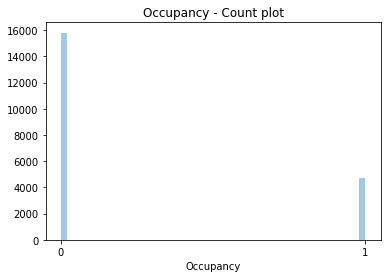

In [0]:
sns.distplot(y, kde=False, rug=False)
plt.xticks([0, 1])
plt.title('Occupancy - Count plot')
plt.show()

In [0]:
for val, num in y.value_counts().items():
    print(f'Value: {val}\tObs: {num:5d}\tFreq: {num/len(y):.1%}')

Value: 0	Obs: 15807	Freq: 76.9%
Value: 1	Obs:  4742	Freq: 23.1%


### (4) Definizione delle metriche di interesse

**Confusion Matrix**


![Confusion Matrix](https://miro.medium.com/max/797/1*CPnO_bcdbE8FXTejQiV2dg.png)

Punto di vista `predicted`:
$$Precision = \frac{tp}{tp+fp}$$
Punto di vista `actual`:
$$Recall = True Positive Rate = \frac{tp}{tp+fn}$$
Punto di vista `actual`:
$$True Negative Rate = \frac{tn}{tn+fp}$$

Punto di vista "misto":
$$Accuracy = \frac{tp + tn}{tp+tn+fp+fn}$$

[Wikipedia: PRECISION & RECALL](https://en.wikipedia.org/wiki/Precision_and_recall)

![Precision / Recall](https://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg)

**Falsi positivi**:  [errore di tipo I](https://en.wikipedia.org/wiki/Type_I_and_type_II_errors#Type_I_error)

**Falsi negativi**: [errore di tipo II](https://en.wikipedia.org/wiki/Type_I_and_type_II_errors#Type_II_error)

![Null Hypothesis](https://i.pinimg.com/originals/aa/27/41/aa2741743be5d931d7fa896babb22c8c.jpg)

**$F_1$ SCORE**: [media armonica](https://en.wikipedia.org/wiki/Harmonic_mean#Harmonic_mean_of_two_numbers) tra `precision` e `recall`


---


Media armonica:
$$\tilde{\mu} = \left(\frac{\sum_{i=1}^{N} (x_i)^{-1}}{N}\right)^{-1}$$
$$\tilde{\mu} = \frac{N}{\sum_{i=1}^{N} \frac{1}{x_i}}$$
La media armonica è il reciproco della media aritmetica dei reciproci. La media armonica è maggiormente influenzata dai più bassi valori assunti da $x_i$.



---



$F_1$ score:
$$F_1 = \left(\frac{precision^{-1} + recall^{-1}}{2}\right)^{-1}$$
$$F_1 = 2\left(\frac{precision \cdot recall}{precision + recall}\right)$$

[Qui](https://stackoverflow.com/questions/26355942/why-is-the-f-measure-a-harmonic-mean-and-not-an-arithmetic-mean-of-the-precision) per maggiori dettagli.

**`Al lupo, al lupo!`**

> I catastrofisti hanno elevato *recall* ma bassissima *precision*

In [0]:
def class_report(model, X_test, y_test):
    print(classification_report(y_test, model.predict(X_test)), '\n')
    
    cm = confusion_matrix(y_test, model.predict(X_test))
    print('Confusion Matrix\n', cm)
    
    # Plot confusion matrix 
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap=plt.cm.Blues)
    plt.ylabel('True label')
    plt.yticks(rotation=90)
    plt.xlabel('Predicted label')
    plt.title('Confusion matrix')   

**ROC e AUC**

> * ROC (Receiver Operating Characteristics) curve
> * AUC (Area Under The Curve) 


[Qui](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5) per maggiori info.

![ROC/AUC](https://miro.medium.com/max/361/1*pk05QGzoWhCgRiiFbz-oKQ.png)

$$TPR = Recall = \frac{tp}{tp+fn}$$
$$FPR = \frac{fp}{tp+fn}$$

### (5) Dummy Model
Prima di sviluppare algoritmi complessi è buona pratica sviluppare algoritmi estremamente banali così da poter disporre di un benchmark per le successive migliorie

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      4735
           1       0.00      0.00      0.00      1430

    accuracy                           0.77      6165
   macro avg       0.38      0.50      0.43      6165
weighted avg       0.59      0.77      0.67      6165
 

Confusion Matrix
 [[4735    0]
 [1430    0]]


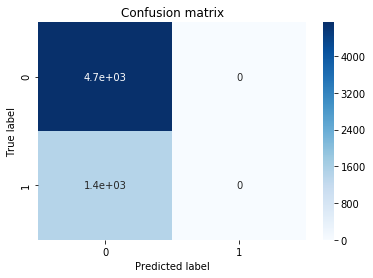

In [0]:
strategy = 'most_frequent'
dummy_model = DummyClassifier(strategy=strategy)

dummy_model.fit(X_train, y_train)
class_report(dummy_model, X_test, y_test)

### Tecniche "avanzate" di validazione

> Esistono diverse tecniche avanzate di validazione tra qui la **k-fold cross validation** e sue varianti.\
[Qui](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators) per maggiori dettagli.

![Kfold](https://www.researchgate.net/profile/Fabian_Pedregosa/publication/278826818/figure/fig10/AS:614336141750297@1523480558954/The-technique-of-KFold-cross-validation-illustrated-here-for-the-case-K-4-involves.png)

![Kfold details](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/K-fold_cross_validation_EN.svg/1200px-K-fold_cross_validation_EN.svg.png)


In [0]:
def cross_valid_report(model, X, y, model_type):  
    # Evaluate scores from CV
    scores = cross_val_score(model, 
                             X, 
                             y, 
                             cv=RepeatedKFold(n_splits=5, n_repeats=5),
                             scoring=None)
    
    cross_valid_type = 'RepeatedKFold'
        
    plt.figure(figsize=(7, 5))
    
    hist, bins, bars = plt.hist(scores, bins='auto', align='left')
    plt.grid(axis='y', alpha=0.75)
    
    # Fix bar alignment
    plt.xticks(bins[:-1])
    
    plt.axvline(x=scores.mean(), color='k', linestyle='--', linewidth=1)
    plt.errorbar(x=scores.mean(), y=0.8, xerr=scores.std(), fmt='o', color='k')
    
    plt.suptitle(f'{cross_valid_type} ({len(scores)} folds) with {model_type}', fontsize=16)
    plt.title(f'Scores (Accuracy) mean={scores.mean():0.3f} +/- {scores.std():0.3f} (1 s.d.)', fontsize=14)
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.show()
    
    return scores

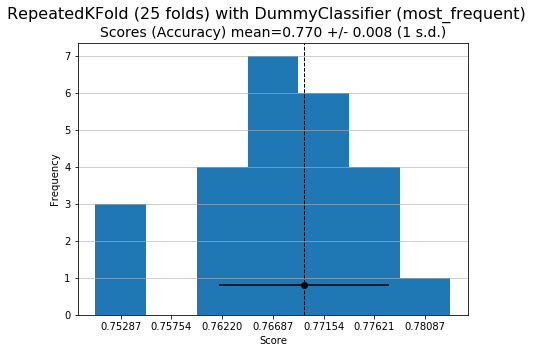

In [0]:
# Verify model stability
# for the dummy model
cross_valid_report(dummy_model, X_train, y_train, model_type=f'DummyClassifier ({strategy})');

**Per l'ottimizzazione degli iper-parametri**

In [0]:
def search_cv_report(model):
    print(f'Best model parameters: {model.best_params_}\n')
    print('Stratified K-Fold Validation')
    print('\tmean_test_score : {:6.2%}'.format(model.cv_results_['mean_test_score'][model.best_index_]))
    print('\tstd_test_score  : {:6.2%}'.format(model.cv_results_['std_test_score'][model.best_index_]))

## Logistic Regression

Ipotesi:
$$log\left(\frac{P(Y=1)}{P(Y=0)}\right) = \mathbf{\beta X}$$
$$log\left(\frac{p}{1-p}\right) = logit(p) = \mathbf{\beta X}$$
con
$$odds = \frac{p}{1-p}$$


allora
$$p = \frac{1}{1+e^{-\mathbf{\beta X}}}$$

> $p$ è descritta come il risultato dell'applicazione della **funzione sigmoidale** su $\mathbf{\beta X}$
$$p=\sigma(\mathbf{\beta X}) = \frac{1}{1+e^{-\mathbf{\beta X}}}$$

[Qui](https://czep.net/stat/mlelr.pdf) una giustificazione formale tramite il metodo della massima verosimiglianza per una distribuzione bernoulliana.

![Logistic Regression](https://miro.medium.com/max/871/1*H64zrYN7-CtOPKrJnTfGTQ.png)

> **Funzione d'errore**\
Sia $z = \mathbf{\beta X}$, poiché
$$p= P(Y=1|z) = \sigma(\mathbf{\beta X})$$
allora
$$P(Y|z) = \sigma(z)^y + \left(1-\sigma(z)\right)^{1-y}$$
Il negativo della log-verosimiglianza vale dunque
$$- l = -log\left(\prod_{i=1}^N P(y_i|z_i)\right) = - \sum_{i=1}^N log\left(\sigma(z_i)^y_i + \left(1-\sigma(z_i)\right)^{1-y_i}\right)$$
L'espressione si può semplificare considerando i valori che $y_i$ può assumere ottenendo così la *risk function* (secondo la ERM)
$$\mathcal{R} = - l = \sum_{i=1}^N - \left[ y_i log(z_i) + (1 - y_i) log(1 - z_i) \right]$$
La *loss function* si desume valga quindi:
$$\mathcal{L} = -y_i log(z_i) - (1 - y_i) log(1 - z_i)$$


> **Regolarizzazione**: [Ridge, Lasso, Elastic](https://en.wikipedia.org/wiki/Lasso_(statistics)#Geometric_interpretation)

![L1 L2 Regularization](https://i.stack.imgur.com/A9yFq.png)

### (6) Model Training [Logistic Regression]

You can also use [LogisticRegressionCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html).

In [0]:
logistic_reg = LogisticRegression(class_weight='balanced', solver='lbfgs')

hyperparameters = {'penalty': ['l2', 'none'],
                   'C': 10**np.arange(-3, 4).astype(float)}

random_search = RandomizedSearchCV(logistic_reg,
                                   hyperparameters, 
                                   n_iter=25,
                                   cv=5,
                                   refit=True,
                                   n_jobs=-1,
                                   verbose=1)

In [0]:
%%time
# Train and store the best model
logistic_model = random_search.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.8s


CPU times: user 906 ms, sys: 226 ms, total: 1.13 s
Wall time: 9.48 s


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    9.2s finished


### (7) Model Validation [Logistic Regression]

In [0]:
# Validate performance
search_cv_report(logistic_model)

Best model parameters: {'penalty': 'l2', 'C': 1.0}

Stratified K-Fold Validation
	mean_test_score : 98.93%
	std_test_score  :  0.15%


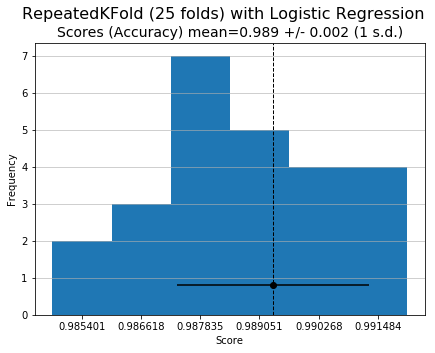

In [0]:
# Verify model stability
# for the logistic regression model
cross_valid_report(logistic_model.best_estimator_, X_train, y_train, model_type='Logistic Regression');

In [0]:
# Test
print(f'Test Accuracy: {logistic_model.score(X_test, y_test):.1%}')

Test Accuracy: 98.9%


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4735
           1       0.96      0.99      0.98      1430

    accuracy                           0.99      6165
   macro avg       0.98      0.99      0.98      6165
weighted avg       0.99      0.99      0.99      6165
 

Confusion Matrix
 [[4676   59]
 [   8 1422]]


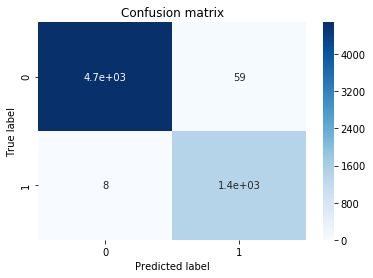

In [0]:
class_report(logistic_model, X_test, y_test)

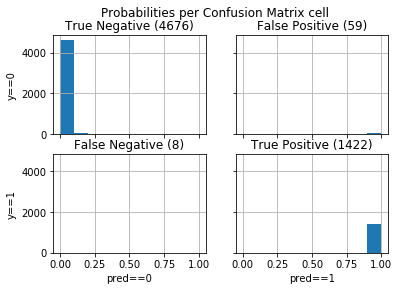

In [0]:
y_pred_proba = logistic_model.predict_proba(X_test)

df_predictions = pd.DataFrame({'y': y_test, 'y_proba': y_pred_proba[:,1]})
fig, axs = plt.subplots(ncols=2, nrows=2, sharex=True, sharey=True)
# show true-pos 

bins = np.arange(0, 1.01, 0.1)

def show_quarter(df, query, col, title, ax, bins, x_label=None, y_label=None):
    results = df.query(query)
    results[col].hist(ax=ax, bins=bins); 
    if y_label:
        ax.set_ylabel(y_label)
    if x_label:
        ax.set_xlabel(x_label)
    ax.set_title(title + " ({})".format(results.shape[0])) #IANBOB
    
show_quarter(df_predictions, "y==0 and y_proba < 0.5", "y_proba", "True Negative", axs[0][0], bins, y_label="y==0")
show_quarter(df_predictions, "y==0 and y_proba >= 0.5", "y_proba", "False Positive", axs[0][1], bins)
show_quarter(df_predictions, "y==1 and y_proba >= 0.5", "y_proba", "True Positive", axs[1][1], bins, x_label="pred==1")
show_quarter(df_predictions, "y==1 and y_proba < 0.5", "y_proba", "False Negative", axs[1][0], bins, x_label="pred==0", y_label="y==1")
fig.suptitle("Probabilities per Confusion Matrix cell");

### (8) Worst Predictions Analysis [Logistic Regression]

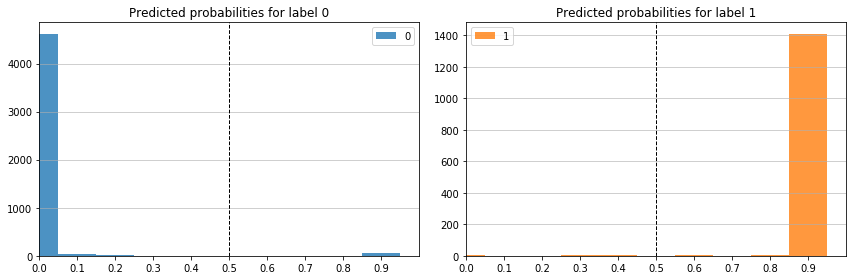

In [0]:
#Identify worsts predictions
def get_worst_pred(model, X, y):
    proba_y_pred = model.predict_proba(X)[:,1]
    data = pd.DataFrame({'y_pred_proba': proba_y_pred}, index=X.index)
    data['y_truth'] = y
    data['abs_residual'] = (data.y_truth - data.y_pred_proba).abs()

    data.sort_values(by=['abs_residual'], ascending=False, inplace=True)
    
    # Plot predictions for every label
    labels = data.y_truth.unique().tolist()
    colors = plt.rcParams["axes.prop_cycle"]()
    fig, ax = plt.subplots(nrows=1, ncols=len(labels), figsize=(6*(len(labels)), 4))
    
    # A subplot for every label
    for i, label in enumerate(labels):
        tmp = data.loc[data.y_truth == label].y_pred_proba
        
        # Histogram
        hist, bins, bars = ax[i].hist(tmp, 
                                      bins=np.arange(0, 1.01, 0.1),
                                      align='left',
                                      label=f'{label}',
                                      color=next(colors)['color'], 
                                      alpha=0.8)
        ax[i].grid(axis='y', alpha=0.75)
    
        # Fix bar alignment
        ax[i].set_xticks(bins[:-1])
        
        # Vertical line
        ax[i].axvline(x=0.5, color='k', linestyle='--', linewidth=1)
        
        ax[i].set_xlim((0, 1.0))
        ax[i].legend()
        ax[i].set_title(f'Predicted probabilities for label {label}')

    fig.tight_layout()
    fig.show()

    return data

df_worst_pred = get_worst_pred(logistic_model, X_test, y_test)

In [0]:
df_worst_pred.query('y_truth == 0').head(10)

,y_pred_proba,y_truth,abs_residual
date,,,
2015-02-05 12:57:00,0.999952,0,0.999952
2015-02-05 12:56:00,0.999848,0,0.999848
2015-02-03 13:35:00,0.999776,0,0.999776
2015-02-03 13:36:00,0.999732,0,0.999732
2015-02-03 13:37:00,0.999665,0,0.999665
2015-02-13 13:44:00,0.999618,0,0.999618
2015-02-13 13:40:00,0.999565,0,0.999565
2015-02-03 12:21:00,0.999373,0,0.999373
2015-02-05 13:36:00,0.998867,0,0.998867


In [0]:
df_worst_pred.query('y_truth == 1').head(10)

,y_pred_proba,y_truth,abs_residual
date,,,
2015-02-13 18:05:00,0.000341,1,0.999659
2015-02-17 13:01:00,0.000679,1,0.999321
2015-02-09 13:11:00,0.000909,1,0.999091
2015-02-05 18:04:00,0.122404,1,0.877596
2015-02-12 17:44:00,0.301760,1,0.698240
2015-02-09 08:45:00,0.384955,1,0.615045
2015-02-04 07:38:00,0.453293,1,0.546707
2015-02-05 13:32:00,0.466796,1,0.533204
2015-02-06 12:53:00,0.607992,1,0.392008


**Check features for worst predicted points**

In [0]:
# Given the filter above (for 1 or 0 errors), show the worst offenders
index_to_debug = df_worst_pred.query('y_truth == 1').index
points_to_debug = X_test.loc[index_to_debug].head(10)
points_to_debug.style.background_gradient(cmap='summer', low=2).set_caption('For worsts errors, show the features we use')

,Temperature,Humidity,Light,CO2,Hour_sin,Hour_cos
date,,,,,,
2015-02-13 18:05:00,21.29,32.79,0,577,-0.979084,0.203456
2015-02-17 13:01:00,21.7,32.895,37,1143,-0.398401,-0.917211
2015-02-09 13:11:00,21.5,33.2225,31,1246,-0.398401,-0.917211
2015-02-05 18:04:00,22.025,24.0475,213,845.5,-0.979084,0.203456
2015-02-12 17:44:00,21.89,27.89,279.333,603.667,-0.997669,-0.0682424
2015-02-09 08:45:00,19.525,27.025,289.75,473.75,0.81697,-0.57668
2015-02-04 07:38:00,20.39,23.7,311.75,474.75,0.942261,-0.33488
2015-02-05 13:32:00,22.29,26.1667,334.333,900.333,-0.398401,-0.917211
2015-02-06 12:53:00,21.7,20,377.75,757.75,-0.136167,-0.990686


**Example of debugging**

In [0]:
# Example of debugging
point_to_debug = X_test.loc[index_to_debug[0]]
print('Debugging:', point_to_debug, 
      'with scores:', df_worst_pred.loc[point_to_debug.name], 
      sep='\n\n')

Debugging:

Temperature     21.290000
Humidity        32.790000
Light            0.000000
CO2            577.000000
Hour_sin        -0.979084
Hour_cos         0.203456
Name: 2015-02-13 18:05:00, dtype: float64

with scores:

y_pred_proba    0.000341
y_truth         1.000000
abs_residual    0.999659
Name: 2015-02-13 18:05:00, dtype: float64


### (9) Model vs Dummy Classifier [Logistic Regression]

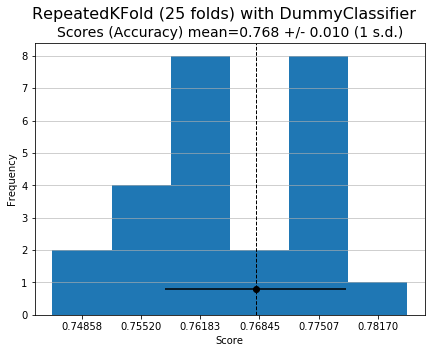

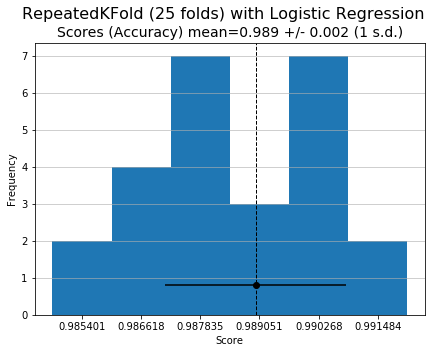

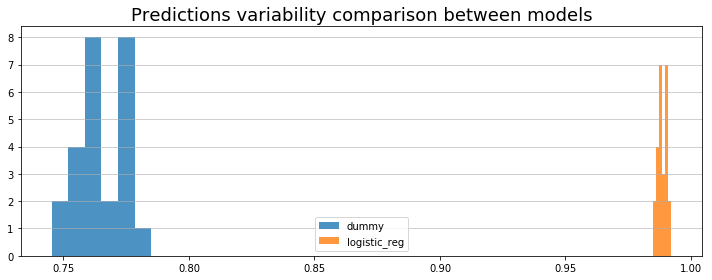

In [0]:
scores = {'dummy': cross_valid_report(dummy_model, X_test, y_test, model_type=f'DummyClassifier'),
          'logistic_reg': cross_valid_report(logistic_model.best_estimator_, X_test, y_test, model_type=f'Logistic Regression')}

df_scores = pd.DataFrame(scores)


# Plot scores for every model
plt.figure(figsize=(10, 4))
colors = plt.rcParams["axes.prop_cycle"]()

# A subplot for every label
for i, col in enumerate(df_scores.columns):
    tmp = df_scores[col]

    # Histogram
    plt.hist(tmp, 
             bins='auto',
             align='left',
             label=f'{col}',
             color=next(colors)['color'], 
             alpha=0.8)

plt.grid(axis='y', alpha=0.75)
plt.title(f'Predictions variability comparison between models', fontsize=18)
plt.legend(loc='auto')
plt.tight_layout()
plt.show()

## k-Nearest Neighbour

Si dispone di un training set composto dalle coppie $(\mathbf{x}_i, y_i)_{i=1,\dots, N}$.

Sia $d$ una distanza (una norma) nello spazio delle covariate che permette di misurare la distanza tra $\mathbf{x}_i$ e $\mathbf{x}_j$.
$$d: \mathcal{X} \times \mathcal{X}\mapsto \mathbb{R}$$

Siano $\mathbf{x}$ le features di cui si vuole prevedere il valore di $Y$. Si calcola la distanza tra questo punto nello spazio delle covariate e tutti gli altri presenti nel dataset. 
$$d(\mathbf{x}, \mathbf{x}_1), d(\mathbf{x}, \mathbf{x}_2), \dots, d(\mathbf{x}, \mathbf{x}_N)$$

Si ordinano in ordine crescente le coppie $(\mathbf{x}_i, y_i)_{i=1,\dots, N}$ sulla base delle distanze appena calcolate 
$$d(\mathbf{x}, \mathbf{x}_{i_1}) \le d(\mathbf{x}, \mathbf{x}_{i_2})  \le \dots  \le d(\mathbf{x}, \mathbf{x}_{i_N})$$
ottenendo così l'insieme ordinato
$$(\mathbf{x}_{i_1}, y_{i_1}), (\mathbf{x}_{i_2}, y_{i_2}), \dots, (\mathbf{x}_{i_N}, y_{i_N})$$

> Si fissa un intero $k$.

Il valore $y$ previsto dall'algoritmo si otterrà dunque considerando soltanto le coppie 
$$(\mathbf{x}_{i_1}, y_{i_1}), \dots, (\mathbf{x}_{i_k}, y_{i_k})$$
e assegnando a $y$ il valore tale per cui dati
$$n_0 = \#\{y_k, k\in({i_1}, \dots, {i_k})| y_k = 0\}$$
$$n_1 = \#\{y_k, k\in({i_1}, \dots, {i_k})| y_k = 1\}$$
allora
$$y = \arg\max_{c \in (0, 1)} n_c$$


![k-NN](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/800px-KnnClassification.svg.png)

> **"Il training consiste nella memorizzazione dell'intero training set"**

> **La distanza è tipicamente dimmetrica rispetto alle variabili esplicative** (vedi ad esempio la distanza euclidea)

> **Il tipo di distanza scelta è un iper-parametro!**

> **$k$ è un iper-parametro!**

**Scelta del parametro k**

> *Training*:
![Training](https://i1.wp.com/www.analyticsvidhya.com/wp-content/uploads/2014/10/training-error.png?w=756&ssl=1)

> *Validation*:
![Validation](https://i0.wp.com/www.analyticsvidhya.com/wp-content/uploads/2014/10/training-error_11.png?w=757&ssl=1)

### (6) Model Training [k-Nearest Neighbour]

In [0]:
knn = KNeighborsClassifier()

hyperparameters = {'n_neighbors': np.arange(3, 21), 
                   'weights': ['uniform', 'distance'], 
                   'p': np.arange(1, 5)}

random_search = RandomizedSearchCV(knn,
                                   hyperparameters, 
                                   n_iter=25,
                                   cv=5,
                                   refit=True,
                                   n_jobs=-1,
                                   verbose=1)

In [0]:
%%time
# Train and store the best model
knn_model = random_search.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.9s


CPU times: user 1.17 s, sys: 142 ms, total: 1.31 s
Wall time: 16.3 s


[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   16.0s finished


### (7) Model Validation [k-Nearest Neighbour]

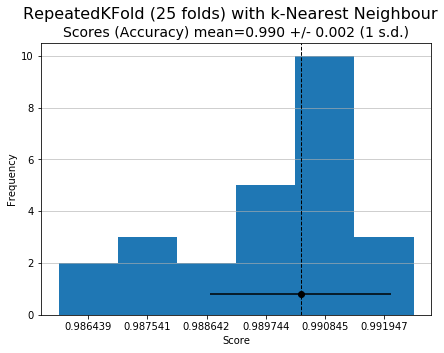

In [0]:
# Verify model stability
# for the logistic regression model
cross_valid_report(knn_model.best_estimator_, X_train, y_train, model_type='k-Nearest Neighbour');

In [0]:
# Test
print(f'Test Accuracy: {knn_model.score(X_test, y_test):.1%}')

Test Accuracy: 99.0%


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4735
           1       0.97      0.99      0.98      1430

    accuracy                           0.99      6165
   macro avg       0.98      0.99      0.99      6165
weighted avg       0.99      0.99      0.99      6165
 

Confusion Matrix
 [[4690   45]
 [  14 1416]]


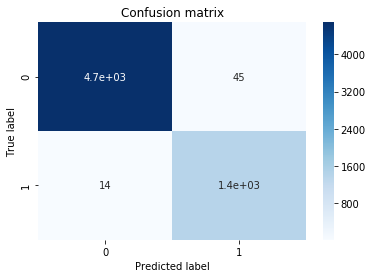

In [0]:
class_report(knn_model, X_test, y_test)

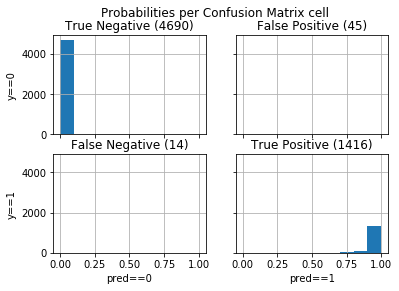

In [0]:
y_pred_proba = knn_model.predict_proba(X_test)

df_predictions = pd.DataFrame({'y': y_test, 'y_proba': y_pred_proba[:,1]})
fig, axs = plt.subplots(ncols=2, nrows=2, sharex=True, sharey=True)
# show true-pos 

bins = np.arange(0, 1.01, 0.1)

def show_quarter(df, query, col, title, ax, bins, x_label=None, y_label=None):
    results = df.query(query)
    results[col].hist(ax=ax, bins=bins); 
    if y_label:
        ax.set_ylabel(y_label)
    if x_label:
        ax.set_xlabel(x_label)
    ax.set_title(title + " ({})".format(results.shape[0])) #IANBOB
    
show_quarter(df_predictions, "y==0 and y_proba < 0.5", "y_proba", "True Negative", axs[0][0], bins, y_label="y==0")
show_quarter(df_predictions, "y==0 and y_proba >= 0.5", "y_proba", "False Positive", axs[0][1], bins)
show_quarter(df_predictions, "y==1 and y_proba >= 0.5", "y_proba", "True Positive", axs[1][1], bins, x_label="pred==1")
show_quarter(df_predictions, "y==1 and y_proba < 0.5", "y_proba", "False Negative", axs[1][0], bins, x_label="pred==0", y_label="y==1")
fig.suptitle("Probabilities per Confusion Matrix cell");

### (8) Worst Predictions Analysis [k-Nearest Neighbour]

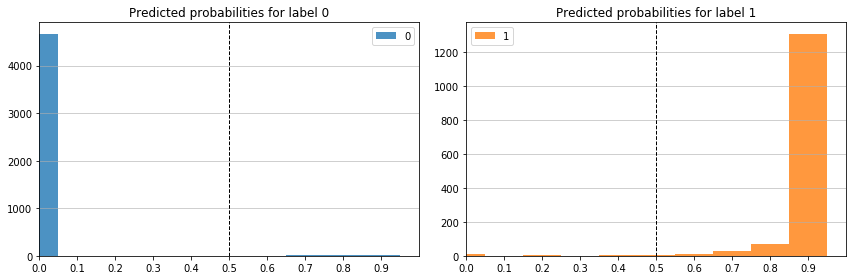

In [0]:
#Identify worsts predictions
df_worst_pred = get_worst_pred(knn_model, X_test, y_test)

In [0]:
df_worst_pred.query('y_truth == 0').head(10)

,y_pred_proba,y_truth,abs_residual
date,,,
2015-02-05 12:57:00,1.0,0,1.0
2015-02-17 13:29:00,1.0,0,1.0
2015-02-17 13:28:00,1.0,0,1.0
2015-02-13 08:58:00,1.0,0,1.0
2015-02-05 08:22:00,1.0,0,1.0
2015-02-11 15:25:00,1.0,0,1.0
2015-02-12 08:34:00,1.0,0,1.0
2015-02-13 08:59:00,1.0,0,1.0
2015-02-05 12:56:00,1.0,0,1.0


In [0]:
df_worst_pred.query('y_truth == 1').head(10)

,y_pred_proba,y_truth,abs_residual
date,,,
2015-02-12 08:31:00,0.000000,1,1.000000
2015-02-04 07:38:00,0.000000,1,1.000000
2015-02-13 18:05:00,0.000000,1,1.000000
2015-02-09 08:45:00,0.000000,1,1.000000
2015-02-09 13:11:00,0.000000,1,1.000000
2015-02-17 13:01:00,0.000000,1,1.000000
2015-02-02 18:04:00,0.049741,1,0.950259
2015-02-17 08:39:00,0.058758,1,0.941242
2015-02-12 17:44:00,0.093726,1,0.906274


**Check features for worst predicted points**

In [0]:
# Given the filter above (for 1 or 0 errors), show the worst offenders
index_to_debug = df_worst_pred.query('y_truth == 1').index
points_to_debug = X_test.loc[index_to_debug].head(10)
points_to_debug.style.background_gradient(cmap='summer', low=2).set_caption('For worsts errors, show the features we use')

,Temperature,Humidity,Light,CO2,Hour_sin,Hour_cos
date,,,,,,
2015-02-12 08:31:00,20.6,22.195,358,647,0.81697,-0.57668
2015-02-04 07:38:00,20.39,23.7,311.75,474.75,0.942261,-0.33488
2015-02-13 18:05:00,21.29,32.79,0,577,-0.979084,0.203456
2015-02-09 08:45:00,19.525,27.025,289.75,473.75,0.81697,-0.57668
2015-02-09 13:11:00,21.5,33.2225,31,1246,-0.398401,-0.917211
2015-02-17 13:01:00,21.7,32.895,37,1143,-0.398401,-0.917211
2015-02-02 18:04:00,22.39,25.0925,310.25,809,-0.979084,0.203456
2015-02-17 08:39:00,20.5667,30.5,301,785.667,0.81697,-0.57668
2015-02-12 17:44:00,21.89,27.89,279.333,603.667,-0.997669,-0.0682424


**Example of debugging**

In [0]:
# Example of debugging
point_to_debug = X_test.loc[index_to_debug[0]]
print('Debugging:', point_to_debug, 
      'with scores:', df_worst_pred.loc[point_to_debug.name], 
      sep='\n\n')

Debugging:

Temperature     20.60000
Humidity        22.19500
Light          358.00000
CO2            647.00000
Hour_sin         0.81697
Hour_cos        -0.57668
Name: 2015-02-12 08:31:00, dtype: float64

with scores:

y_pred_proba    0.0
y_truth         1.0
abs_residual    1.0
Name: 2015-02-12 08:31:00, dtype: float64


### (9) Model vs Dummy Classifier [k-Nearest Neighbour]

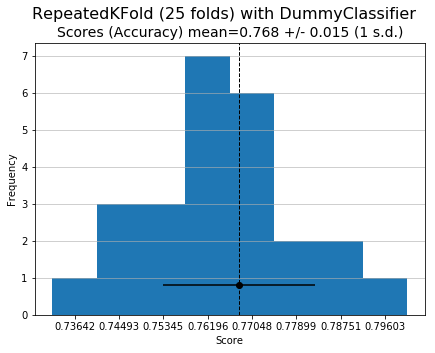

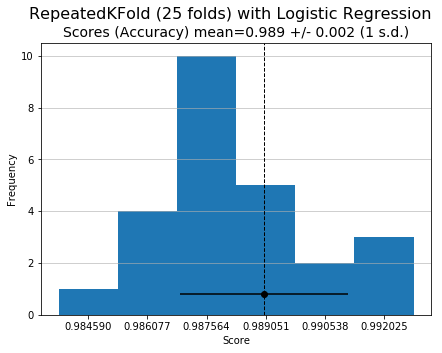

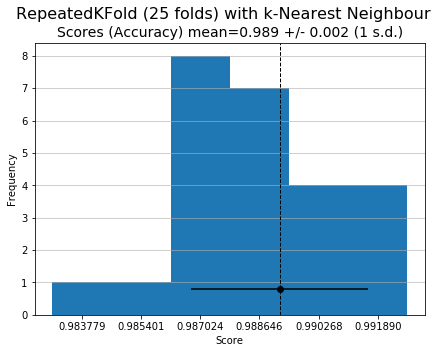

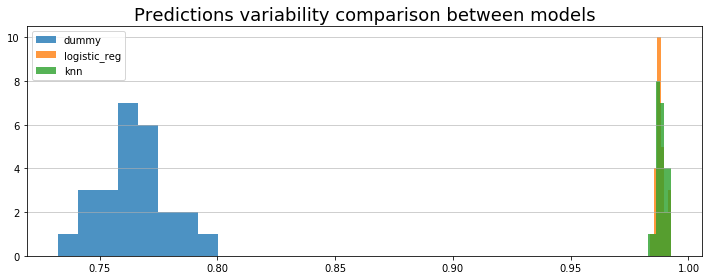

In [0]:
scores = {'dummy': cross_valid_report(dummy_model, X_test, y_test, model_type=f'DummyClassifier'),
          'logistic_reg': cross_valid_report(logistic_model.best_estimator_, X_test, y_test, model_type=f'Logistic Regression'),
          'knn': cross_valid_report(knn_model.best_estimator_, X_test, y_test, model_type=f'k-Nearest Neighbour')}

df_scores = pd.DataFrame(scores)

    
# Plot scores for every model
plt.figure(figsize=(10, 4))
colors = plt.rcParams["axes.prop_cycle"]()

# A subplot for every label
for i, col in enumerate(df_scores.columns):
    tmp = df_scores[col]

    # Histogram
    plt.hist(tmp, 
             bins='auto',
             align='left',
             label=f'{col}',
             color=next(colors)['color'], 
             alpha=0.8)

plt.grid(axis='y', alpha=0.75)
plt.title(f'Predictions variability comparison between models', fontsize=18)
plt.legend(loc='auto')
plt.tight_layout()
plt.show()

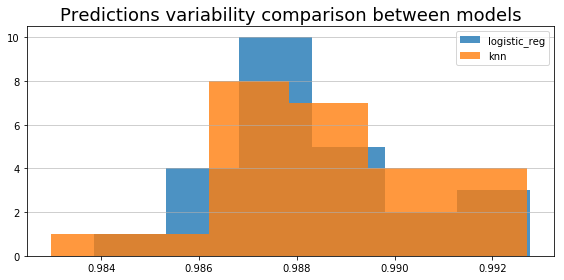

In [0]:
####################################
# Only logistic regression and kNN #
####################################

# Plot scores for every model
plt.figure(figsize=(8, 4))
colors = plt.rcParams["axes.prop_cycle"]()

# A subplot for every label
for i, col in enumerate(df_scores.drop(columns=['dummy']).columns):
    tmp = df_scores[col]

    # Histogram
    plt.hist(tmp, 
             bins='auto',
             align='left',
             label=f'{col}',
             color=next(colors)['color'], 
             alpha=0.8)

plt.grid(axis='y', alpha=0.75)
plt.title(f'Predictions variability comparison between models', fontsize=18)
plt.legend(loc='auto')
plt.tight_layout()
plt.show()

### (10) Model Explanation [k-Nearest Neighbour]

**Usiamo la libreria Shap**

In [0]:
!pip install shap

In [0]:
import shap

# load JS visualization code to notebook
shap.initjs()

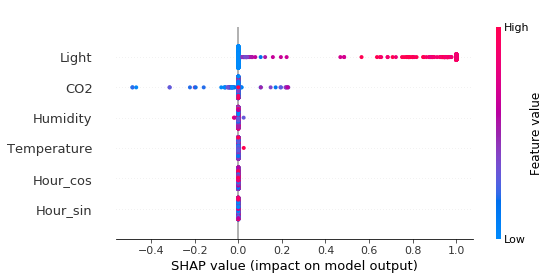

In [0]:
f = lambda x: knn_model.predict_proba(x)[:,1]
med = X_train.median().values.reshape((1,X_train.shape[1]))
explainer = shap.KernelExplainer(f, med)
shap_values = explainer.shap_values(X_test.iloc[0:1000,:], nsamples=1000, l1_reg='bic')

shap.summary_plot(shap_values, X_test.iloc[0:1000,:])

## Support Vector Machine

Le [SVMs](http://www.robots.ox.ac.uk/~az/lectures/ml/lect3.pdf) hanno l'obbiettivo di classificare i punti nello spazio delle covariate tramite lo sviluppo di quello che viene detto un `linear classifier`.

Date $s$ le variabili esplicative che compongono il vettore $\mathbf{x}$, si intende cioè determinare le coordinate di un iperpiano di dimensioni $s-1$ tale da separare i punti che hanno label $y=0$ da quelli con $y=1$. 

L'iperpiano scelto (detto *maximum-margin hyperplane*) è quello che massimizza il **margine** cioé la minima distanza tra le due classi.

Si dicono **support vectors** i punti presenti nel training set che sono più vicini all'iperpiano. Se vengono rimossi o modificati alterano la posizione dell'iperpiano divisorio. e per questo motivo possono essere considerati gli elementi critici del set di dati.

![maximum-margin hyperplane](https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/617px-SVM_margin.png)

Per costruire un classificatore lineare basta definire un iperpiano
$$f(\mathbf{x})=\mathbf{W^T \phi(x)} + b$$
con $\phi$ una funzione di trasformazione delle covariate.

Sia $Y$ la variabile target che assume valori $-1$ o $1$.
Nel caso di classificazione binaria, se i dati di training sono linearmente separabili, allora è possibile trovare almeno un iperpiano tale che 
$f(\mathbf{x}) > 0$ per $y=1$ e $f(\mathbf{x}) < 0$ per $y=-1$.

Si può allora scrivere questa condizione come
$$y f(\mathbf{x}) > 0$$

La distanza tra un punto $\mathbf{x}$ e l'iperpiano $y(\mathbf{x})$ vale
$$dist(\mathbf{x}, f(\mathbf{x})) = \frac{f(\mathbf{x})}{||\mathbf{W}||}$$
allora rispetto al decision boundary si scrive
$$dist(\mathbf{x}, y f(\mathbf{x})) = \frac{y f(\mathbf{x})}{||\mathbf{W}||}$$

Il margine è dato dalla distanza del segmento perpendicolare all'iperpiano che collega $\mathbf{x}$ a $f(\mathbf{x})$.


Volendo massimizzare il margine si ricerano quindi i parametri $\mathbf{W}$ e $b$ tali che
$$\arg \max_{\mathbf{W}, b} \left[ \frac{1}{||\mathbf{W}||} \min_n y_n (\mathbf{W^T \phi(x_n)} + b )\right]$$

Il/i punto/i $\mathbf{x_n}$ che realizzano la condizione dentro le parentesi quadre sono i **support vectors**.


Poichè la distanza non cambia per variazioni del tipo
$\mathbf{W} \mapsto c\mathbf{W}$ e $b\mapsto cb$. Ciò significa che senza perdita di generalità possiamo dire che
$$y_n f(\mathbf{x_n})=y_n (\mathbf{W^T \phi(x_n)} + b) = 1$$
con $\mathbf{x_n}$ il support vector.

Così facendo, sotto le opportune condizioni, la massimizzazione del margine diventa
$$\arg \max_{\mathbf{W}, b} \frac{1}{||\mathbf{W}||} = \arg \min_{\mathbf{W}, b} \frac{1}{2} ||\mathbf{W}||^2$$

Il parametro $b$ è implicitamente determinato dalle condizioni su $\mathbf{W}$.

Attraverso l'utilizzo dei moltiplicatori di Lagrange il problema di ottimizzazione è ridefinito come
$$\arg \min_{\mathbf{W}, b} \frac{1}{2} ||\mathbf{W}||^2 - \sum_n \lambda_n \left[y_n (\mathbf{W^T \phi(x_n)} + b) - 1 \right]$$
ottenendo le seguenti equazioni di risoluzione:
$$\mathbf{W}=\sum_{n=1}^N \lambda_n y_n \mathbf{\phi (x_n)}$$
$$0 =\sum_{n=1}^N \lambda_n y_n$$
con $\lambda_1, \dots, \lambda_n$ i moltiplicatori di Lagrange.

Sostituendo $\mathbf{W}$ nell'equazione dell'iperpiano si trova
$$f(\mathbf{x}) = \left(\sum_{n=1}^N \lambda_n y_n \mathbf{\phi (x_n)}\right)^T \mathbf{\phi (x)} + b = \sum_{n=1}^N \lambda_n y_n \left(\mathbf{\phi (x_n)}^T \mathbf{\phi (x)}\right) + b$$

Abbiamo così espresso la funzione di classificazione nella sua **forma duale**.

Definiamo la **funzione di kernel** come una funzione che riceve in input due punti dello spazio delle covariate e restituisce un numero reale.
$$k(\cdot, \cdot): \mathcal{X}\times\mathcal{X} \mapsto \mathbb{R}$$

$$k(\mathbf{x_1}, \mathbf{x_2})\in \mathbb{R}$$

Dati tutti i punti del training set è possibile costruire la **Gramm Matrix** $\mathbf{K}$ tale che
$$K_{ij} = k(\mathbf{x_i}, \mathbf{x_j})$$


Evidenziando la funzione di kernel all'interno dell'espressione della forma duale del classificatore si ottiene
$$f(\mathbf{x}) = \sum_{n=1}^N \lambda_n y_n k\left(\mathbf{x_n}, \mathbf{x}\right) + b$$

e il problema di ottimizzazione può essere scritto, sotto le opportune condizioni, come
$$\max_{\lambda_1 \ge 0, \dots, \lambda_N \ge 0} \sum_{i=1}^N \lambda_i - \frac{1}{2} \sum_m \sum_n \lambda_m \lambda_n y_m y_n k(\mathbf{x_m}, \mathbf{x_n})$$

### (6) Model Training [Support Vector Machine]

In [0]:
svc = SVC(class_weight='balanced', probability=True)

hyperparameters = {'C': np.arange(1, 101, 50), 
                   'kernel': ['linear', 'poly', 'rbf'], 
                   'gamma': ['auto', 'scale']}

random_search = RandomizedSearchCV(svc,
                                   hyperparameters, 
                                   n_iter=2,
                                   cv=5,
                                   refit=True,
                                   n_jobs=-1,
                                   verbose=1)


---

**[WARNING]** \
**SVM are very slow at training** 

In [0]:
%%time
# Train and store the best model
svm_model = random_search.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


### (7) Model Validation [Support Vector Machine]

In [0]:
# Validate performance
search_cv_report(svm_model)

In [0]:
# Verify model stability
# for the logistic regression model
cross_valid_report(svm_model.best_estimator_, X_train, y_train, model_type='Support Vector Machine')

In [0]:
# Test
print(f'Test Accuracy: {svm_model.score(X_test, y_test):.1%}')

In [0]:
y_pred_proba = svm_model.predict_proba(X_test)

df_predictions = pd.DataFrame({'y': y_test, 'y_proba': y_pred_proba[:,1]})
fig, axs = plt.subplots(ncols=2, nrows=2, sharex=True, sharey=True)
# show true-pos 

bins = np.arange(0, 1.01, 0.1)

def show_quarter(df, query, col, title, ax, bins, x_label=None, y_label=None):
    results = df.query(query)
    results[col].hist(ax=ax, bins=bins); 
    if y_label:
        ax.set_ylabel(y_label)
    if x_label:
        ax.set_xlabel(x_label)
    ax.set_title(title + " ({})".format(results.shape[0])) #IANBOB
    
show_quarter(df_predictions, "y==0 and y_proba < 0.5", "y_proba", "True Negative", axs[0][0], bins, y_label="y==0")
show_quarter(df_predictions, "y==0 and y_proba >= 0.5", "y_proba", "False Positive", axs[0][1], bins)
show_quarter(df_predictions, "y==1 and y_proba >= 0.5", "y_proba", "True Positive", axs[1][1], bins, x_label="pred==1")
show_quarter(df_predictions, "y==1 and y_proba < 0.5", "y_proba", "False Negative", axs[1][0], bins, x_label="pred==0", y_label="y==1")
fig.suptitle("Probabilities per Confusion Matrix cell");

## (11) Esportazione dell'Algoritmo e Modello definitivo

In [0]:
from joblib import dump, load

# Save the model in local directory
dump(logistic_model, 'model.joblib')

['model.joblib']

In [0]:
def predict_from_df(data, model_path='model'):
    model = load(f'{model_path}.joblib')
    return detect_extreme_values(data).apply(lambda x: model.predict(x.drop(labels='extreme_datapoint').values.reshape(1, -1)) if x['extreme_datapoint'] == False else 'Not Available', axis=1)

# Input Dataset: df without target variable
input_data = df.drop(columns=['Occupancy']).sample(20)
predict_from_df(input_data)

date
2015-02-13 18:28:00    [0]
2015-02-08 16:23:00    [0]
2015-02-07 19:47:00    [0]
2015-02-08 20:43:00    [0]
2015-02-11 16:27:00    [1]
2015-02-06 09:09:00    [1]
2015-02-16 14:37:00    [1]
2015-02-04 01:24:00    [0]
2015-02-17 13:14:00    [0]
2015-02-14 09:51:00    [0]
2015-02-05 05:30:00    [0]
2015-02-10 08:03:00    [0]
2015-02-03 23:23:00    [0]
2015-02-06 08:35:00    [1]
2015-02-08 18:13:00    [0]
2015-02-05 11:10:00    [1]
2015-02-16 22:00:00    [0]
2015-02-14 16:57:00    [0]
2015-02-03 17:31:00    [1]
2015-02-10 02:11:00    [0]
dtype: object

## Esercizi


1.   Si veda cos'è il coefficiente di correlazione di Spearman e quali siano le differenze con quello di Pearson. Quali sono i vantagggi del coefficiente di Spearman? Quando è applicabile?

2.    > Utilizzare la funzione [`sklearn.preprocessing.PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) per produrre nuove variabili esplicative date dall'interazione delle features disponibili.

3.   Provare ad allenare uno dei modelli sovraesposti usando una tecnica diversa per la gestione dell'imbalanced dataset. Si riduca il campionamento delle osservazioni per le quali si osserva `Occupancy = 0` e si confrontino i risultati ottenuti con i due metodi.

4.   > Svolgere un'analisi uni/multivariata dei residui per le previsioni ottenute tramite regressione logistica.

5.   Sfruttare la libreria `sklearn.feature_selection` per automatizzare la selezione delle variabili esplicative.

6.   > Sviluppare il punto `(10) Model Explanation` anche per la regressione logistica.

7. Utilizzare altre funzioni di `shap`.

## Fonti

> `"Python Data Science Handbook: Tools and Techniques for Developers"`, Jake VanderPlas

> `"Data Mining"`, Charu C. Aggarwal

> `"Outlier Analysis"`, Charu C. Aggarwal

> `"Pattern Recognition and Machine Learning"`, Christopher M. Bishop


# Completed Notebook

In [0]:
import datetime
print('Completed running this Notebook at:', datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

Completed running this Notebook at: 2019-10-16 10:49:51
